<a href="https://colab.research.google.com/github/MaanasArora/computer-vision-projects/blob/main/flowers_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds

In [ ]:
ds = tfds.load('tf_flowers', as_supervised=True)

In [ ]:
def normalize_img(image, label):
  resized = tf.image.resize(image, (256, 256))
  return tf.cast(resized, tf.float32) / 255., label

data = ds['train']
data = data.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
data = data.batch(64)

In [ ]:
def define_model():
  model = keras.Sequential()

  model.add(layers.Conv2D(16, 3, activation='relu', input_shape=(256, 256, 3)))
  model.add(layers.Conv2D(32, 3, activation='relu'))
  model.add(layers.MaxPooling2D())

  model.add(layers.Conv2D(64, 3, activation='relu'))
  model.add(layers.Conv2D(128, 3, activation='relu'))
  model.add(layers.MaxPooling2D())

  model.add(layers.Conv2D(256, 3, activation='relu'))
  model.add(layers.MaxPooling2D())

  model.add(layers.Flatten())
  model.add(layers.Dense(5, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model


model = define_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 conv2d_31 (Conv2D)          (None, 252, 252, 32)      4640      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 61, 61, 128)      0         
 g2D)                                                 

In [ ]:
model.fit(data, epochs=20)

Epoch 1/5
58/58 [==============================] - 16s 282ms/step - loss: 0.1886 - accuracy: 0.9351
Epoch 2/5
58/58 [==============================] - 16s 277ms/step - loss: 0.1186 - accuracy: 0.9616
Epoch 3/5
58/58 [==============================] - 16s 273ms/step - loss: 0.0828 - accuracy: 0.9760
Epoch 4/5
58/58 [==============================] - 16s 270ms/step - loss: 0.0576 - accuracy: 0.9828
Epoch 5/5
58/58 [==============================] - 16s 271ms/step - loss: 0.0458 - accuracy: 0.9877


1/1 [==============================] - 0s 50ms/step


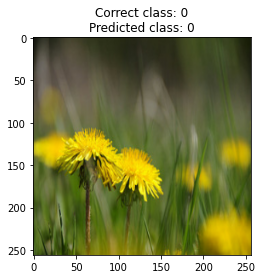

In [ ]:
def show_sample(i=0):
  images, labels = data.take(1).get_single_element()
  image, label = images[i], labels[i]

  pred = model.predict(np.expand_dims(image, axis=0))
  pred_label = np.argmax(pred, axis=1)[0]

  plt.title(f'Correct class: {label}\nPredicted class: {pred_label}')
  plt.imshow(image)

show_sample(5)